# California Housing Prices - Regression
In this assignment we applied regression models to predict housing prices
### Features:
- longitude: A measure of how far west a house is; a higher value is farther west
- latitude: A measure of how far north a house is; a higher value is farther north
- housing_median_age: Median age of a house within a block; a lower number is a newer building
- total_rooms: Total number of rooms within a block
- total_bedrooms: Total number of bedrooms within a block
- population: Total number of people residing within a block
- households: Total number of households, a group of people residing within a home unit, for a block
- median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- ocean_proximity: Location of the house w.r.t ocean/sea
### Target variable:
median_house_value: Median house value for households within a block (measured in US Dollars)
# Feature Engineering and Selection
## Prerequisite

In [154]:
# helper packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import sklearn 
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression


## Cali dataset

In [155]:
# read california housing dataset
cali = pd.read_csv("../data/housing.csv")
# show dimensions
cali.shape

(20640, 10)

In [156]:
# show data types and other details in the dataset
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [157]:
# show 20 random rows
cali.sample(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20323    -119.12     34.23                35.0       2028.0           554.0   
19005    -121.93     38.31                25.0        185.0            32.0   
17055    -122.25     37.47                35.0       3183.0           515.0   
8898     -118.49     34.02                28.0       2545.0           752.0   
9931     -122.30     38.29                20.0       1789.0           434.0   
4301     -118.29     34.09                39.0        336.0           173.0   
3731     -118.41     34.18                43.0       1840.0           356.0   
17540    -121.88     37.35                43.0       1086.0           219.0   
20613    -121.55     39.09                31.0       1728.0           365.0   
20348    -119.05     34.19                39.0        143.0            36.0   
3545     -118.63     34.24                 9.0       4759.0           924.0   
13709    -117.21     34.11                26.0       1757.0           304.0   
3298     -122.63     38.96                17.0       1708.0           459.0   
17563    -121.89     37.31                52.0       1994.0           404.0   
17652    -121.88     37.26                13.0       1676.0           471.0   
3954     -118.65     34.20                23.0       7480.0          1084.0   
16505    -121.13     37.74                21.0       2376.0           475.0   
225      -122.20     37.80                41.0       2070.0           354.0   
4291     -118.30     34.10                36.0       2284.0           899.0   
13918    -116.02     34.18                 8.0        569.0            97.0   

       population  households  median_income  median_house_value  \
20323      2252.0       521.0         2.4643            182000.0   
19005        85.0        32.0         4.8750            250000.0   
17055      1313.0       487.0         5.9062            383200.0   
8898       1548.0       679.0         2.9125            475000.0   
9931       1113.0       398.0         2.4728            139700.0   
4301        586.0       151.0         1.8056            262500.0   
3731        966.0       323.0         4.7171            237900.0   
17540       715.0       226.0         4.2381            193500.0   
20613      1167.0       384.0         1.4958             53400.0   
20348       113.0        33.0         2.8942            275000.0   
3545       1884.0       915.0         4.8333            277200.0   
13709       905.0       281.0         3.4103             90900.0   
3298        633.0       312.0         1.7500             64000.0   
17563      1014.0       389.0         4.3882            223600.0   
17652       710.0       406.0         3.8936            225900.0   
3954       3037.0      1058.0         6.9223            338400.0   
16505      1175.0       441.0         3.6016            134600.0   
225         804.0       340.0         5.1184            239600.0   
4291       1964.0       839.0         1.9297            203300.0   
13918       312.0        96.0         4.3021             94500.0   

      ocean_proximity  
20323      NEAR OCEAN  
19005          INLAND  
17055      NEAR OCEAN  
8898        <1H OCEAN  
9931         NEAR BAY  
4301        <1H OCEAN  
3731        <1H OCEAN  
17540       <1H OCEAN  
20613          INLAND  
20348      NEAR OCEAN  
3545        <1H OCEAN  
13709          INLAND  
3298           INLAND  
17563       <1H OCEAN  
17652       <1H OCEAN  
3954        <1H OCEAN  
16505          INLAND  
225          NEAR BAY  
4291        <1H OCEAN  
13918          INLAND

In [158]:
# how many null values do we have
cali.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [159]:
# how many duplicated rows do we have
cali.duplicated().sum()

0

In [160]:
# statistical description of the dataset
cali.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [161]:
# correlation between features
cali.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

<AxesSubplot:>

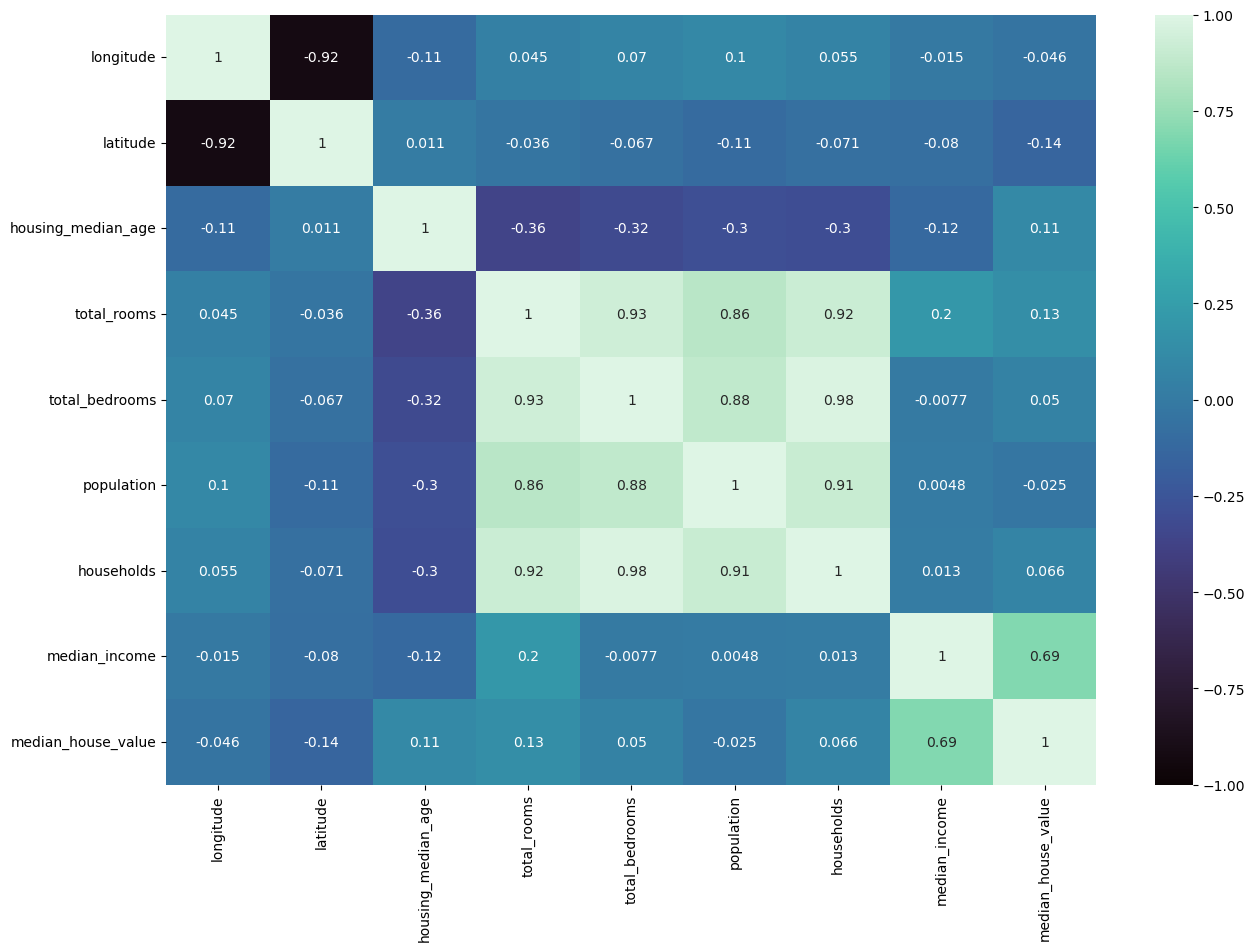

In [162]:
plt.figure(figsize=(15,10))
sns.heatmap(cali.corr(),cmap='mako', annot=True, vmin=-1, vmax=1)

## Check for non-informative predictors
### Feature variance
After testing for feature variace, we could see that there were no constant features, so none were deleted

In [163]:
X = cali.drop('median_house_value',axis = 1)
# remove low variance features
var_thres = VarianceThreshold(threshold=0)
# exception for categorical features
var_thres.fit(X.drop("ocean_proximity", axis=1))
# shows which column is non constant (True)
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Check for imbalanced distributions
Check for factor variable where some levels are very common while others very rare. After using value counts on ocean proximity feature, we can see that 'NEAR OCEAN', 'NEAR BAY' and 'ISLAND' have way lower value counts, in this case we can use Lumping to group them together into one category called 'OTHER'

In [164]:
# before lumping
cali["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [165]:
# replace values 'near ocean' 'near bay' and 'island' with 'other'
cali["ocean_proximity"] = cali["ocean_proximity"].replace(['NEAR OCEAN', 'NEAR BAY', 'ISLAND'], 'OTHER')

In [166]:
# after lumping
cali["ocean_proximity"].value_counts()

<1H OCEAN    9136
INLAND       6551
OTHER        4953
Name: ocean_proximity, dtype: int64

In [167]:
# features
cali2 = cali.dropna()
features = cali2.drop("median_house_value", axis=1)
features = pd.get_dummies(data=features ,drop_first=True)


In [168]:
# target variable
target = cali2["median_house_value"]


In [169]:
model = sm.OLS(target,features)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          2.148e+04
Date:                Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:19:46   Log-Likelihood:                     -2.5689e+05
No. Observations:               20433   AIC:                                  5.138e+05
Df Residuals:                   20423   BIC:                                  5.139e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
longitude               -832.4694    108.194     -7.694      0.000   -1044.539    -620.400
latitude               -2006.4645    358.566     -5.596      0.000   -2709.282   -1303.647
housing_median_age      1138.2147     43.786     25.995      0.000    1052.391    1224.038
total_rooms               -7.0507      0.804     -8.770      0.000      -8.627      -5.475
total_bedrooms            79.1725      6.930     11.425      0.000      65.590      92.755
population               -37.5053      1.094    -34.276      0.000     -39.650     -35.360
households                76.9152      7.493     10.266      0.000      62.229      91.601
median_income           4.016e+04    341.045    117.747      0.000    3.95e+04    4.08e+04
ocean_proximity_INLAND -6.524e+04   1411.194    -46.228      0.000    -6.8e+04   -6.25e+04
ocean_proximity_OTHER   1.091e+04   1311.875      8.316      0.000    8338.268    1.35e+04
==============================================================================
Omnibus:                     4884.909   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17247.520
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                       6.832   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for missingness

Reason for missingness: 
from the mask it seems that values are missing at random.

<AxesSubplot:>

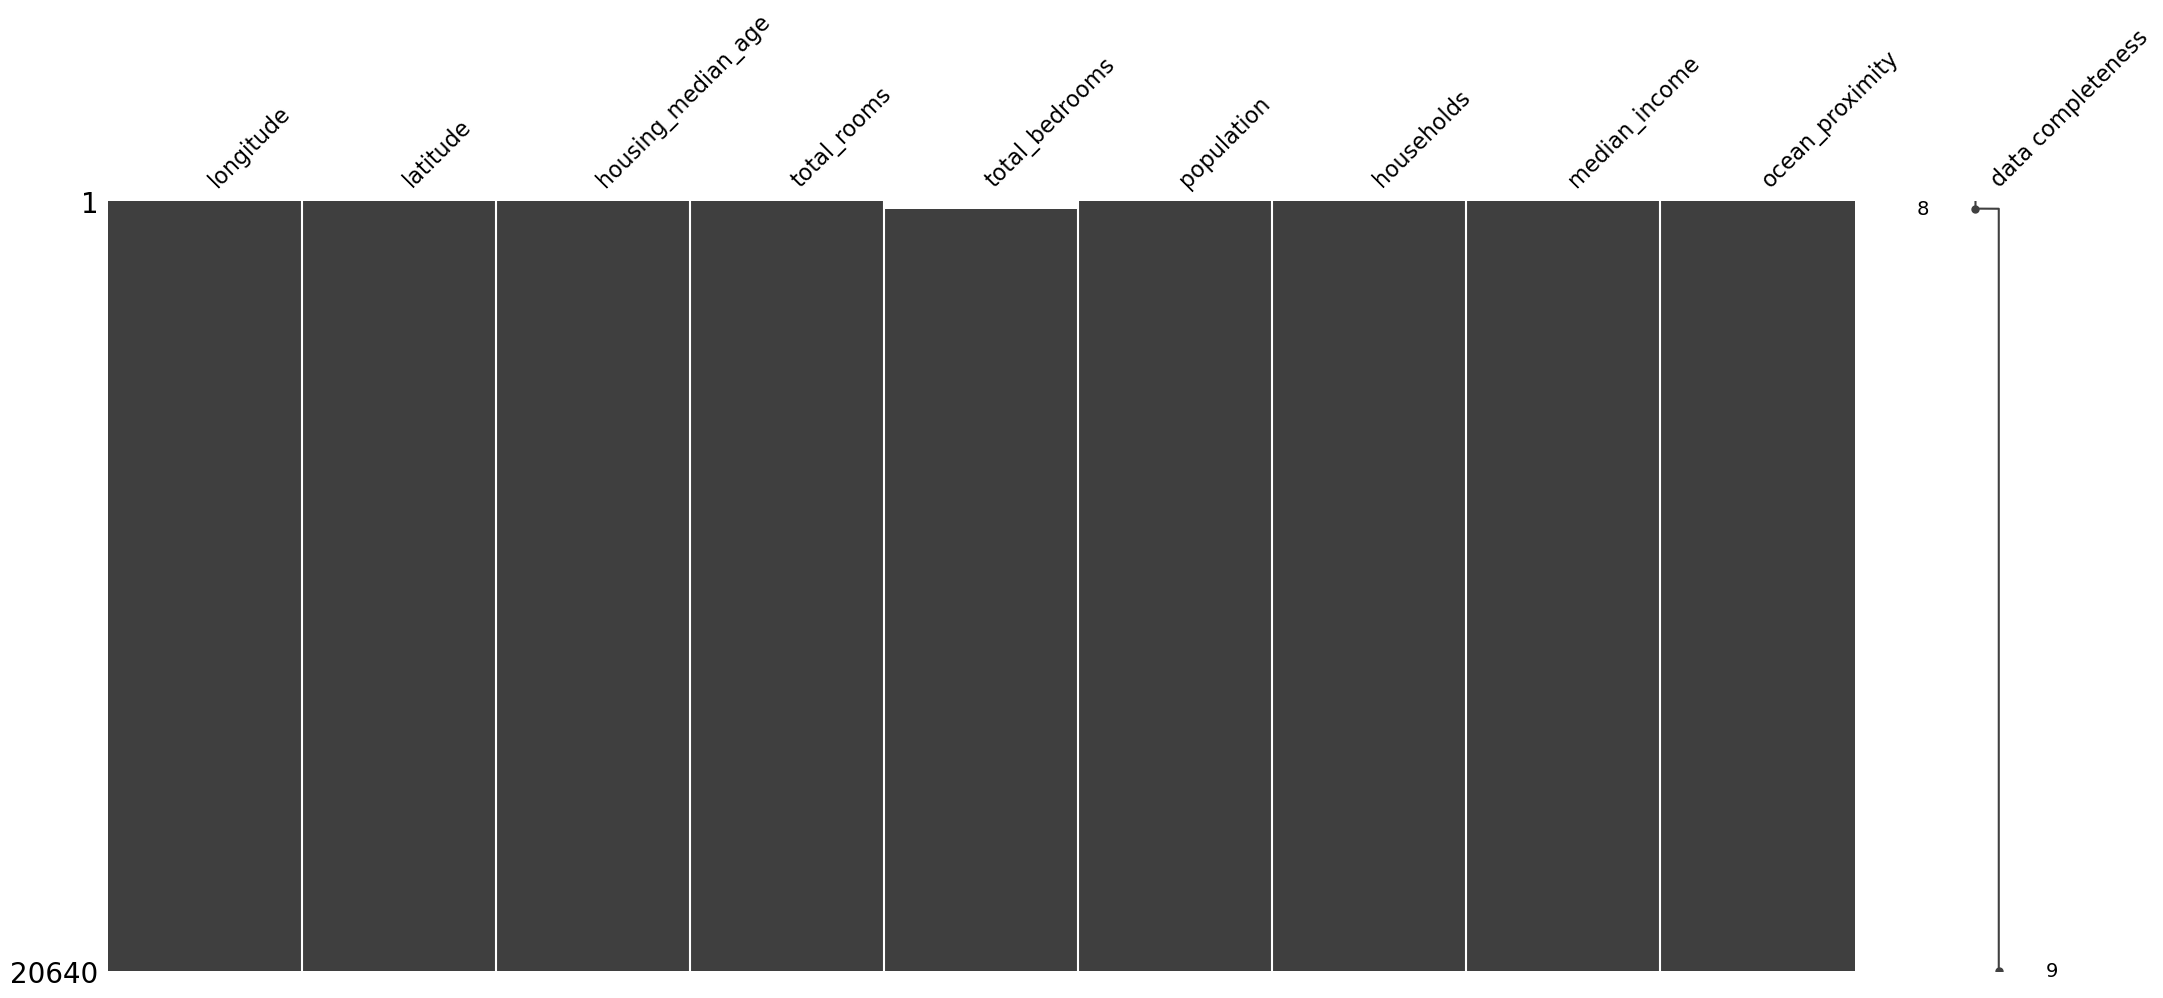

In [170]:
msno.matrix(X, labels=True, filter="bottom", sort="ascending", n=50)

In [171]:
cali[cali['total_bedrooms'].isna()].sample(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6068     -117.86     34.01                16.0       4632.0             NaN   
6835     -118.12     34.08                35.0       2248.0             NaN   
19607    -121.02     37.48                26.0        467.0             NaN   
1493     -122.01     37.94                23.0       3741.0             NaN   
20046    -119.01     36.06                25.0       1505.0             NaN   
19402    -120.93     37.73                14.0       2799.0             NaN   
19818    -119.30     36.57                32.0        728.0             NaN   
9970     -122.48     38.50                37.0       3049.0             NaN   
11311    -117.96     33.78                33.0       1520.0             NaN   
6298     -117.91     34.02                22.0       6269.0             NaN   
7097     -117.98     33.92                27.0       3700.0             NaN   
10236    -117.92     33.87                33.0       1597.0             NaN   
13925    -114.59     34.83                41.0        812.0             NaN   
3328     -122.72     38.88                29.0       2781.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   
6590     -118.18     34.19                48.0       1371.0             NaN   
3912     -118.55     34.19                18.0       5862.0             NaN   
2647     -124.13     40.55                38.0        544.0             NaN   
11351    -117.91     33.76                20.0       4413.0             NaN   
8530     -118.35     33.90                31.0       1547.0             NaN   

       population  households  median_income  median_house_value  \
6068       3038.0       727.0         5.1762            264400.0   
6835       1762.0       622.0         3.0000            253900.0   
19607       244.0        83.0         4.1346            187500.0   
1493       1339.0       499.0         6.7061            322300.0   
20046      1392.0       359.0         1.6812             47700.0   
19402      2294.0       596.0         2.6343             81500.0   
19818       461.0       149.0         3.0156            109100.0   
9970       1287.0       439.0         4.3125            276500.0   
11311       658.0       242.0         4.8750            269300.0   
6298       5587.0      1251.0         3.8201            136200.0   
7097       1793.0       552.0         5.3668            219800.0   
10236      1888.0       423.0         3.0550            157800.0   
13925       375.0       158.0         1.7083             48500.0   
3328        890.0       310.0         1.9906             96600.0   
1456       1420.0       540.0         3.6500            204100.0   
6590        528.0       155.0        15.0001            500001.0   
3912       3161.0      1280.0         3.1106            170600.0   
2647        240.0        91.0         3.2500             94800.0   
11351      4818.0      1063.0         2.8594            215100.0   
8530        956.0       287.0         3.4698            225000.0   

      ocean_proximity  
6068        <1H OCEAN  
6835        <1H OCEAN  
19607          INLAND  
1493            OTHER  
20046          INLAND  
19402          INLAND  
19818          INLAND  
9970           INLAND  
11311       <1H OCEAN  
6298        <1H OCEAN  
7097        <1H OCEAN  
10236       <1H OCEAN  
13925          INLAND  
3328           INLAND  
1456           INLAND  
6590        <1H OCEAN  
3912        <1H OCEAN  
2647        <1H OCEAN  
11351       <1H OCEAN  
8530        <1H OCEAN

In [172]:
# we drop all missing values
cali = cali.dropna()

## Check for extreme values
### outlier detection
Note that extreme value detection and removal only applies to numerical features. To do it we first plot a boxplot of some feature, if we notice it has outliers we run the outlier removal function

<AxesSubplot:>

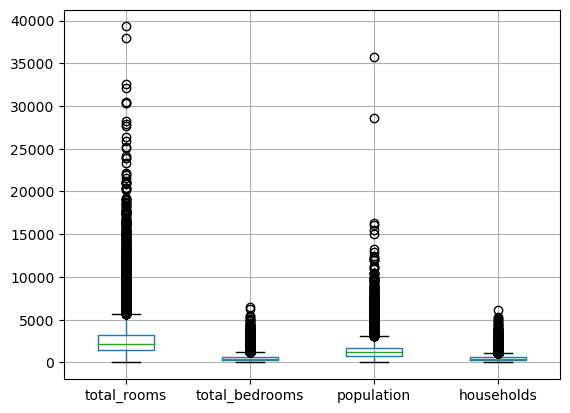

In [173]:
cali.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

<AxesSubplot:xlabel='median_income'>

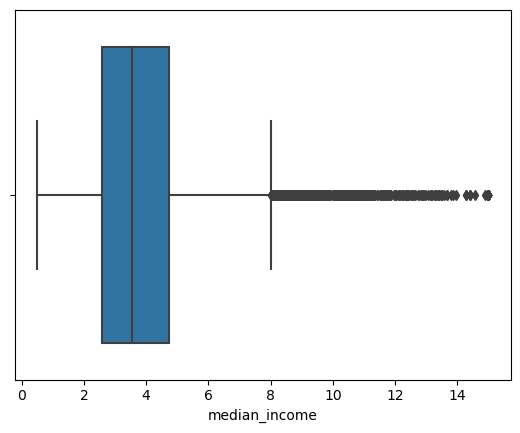

In [174]:
sns.boxplot(x=cali["median_income"])

### outlier removal

In [175]:
for x in ['median_income']:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [176]:
for x in ["total_rooms"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [177]:
for x in ["total_bedrooms"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [178]:
for x in ["population"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [179]:
for x in ["households"]:
    q75,q25 = np.percentile(cali.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    cali.loc[cali[x] < min,x] = np.nan
    cali.loc[cali[x] > max,x] = np.nan

In [180]:
# null values increase since we replaced outliers with NAs
cali.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value       0
ocean_proximity          0
dtype: int64

In [181]:
# now we drop them
cali = cali.dropna(axis = 0)

<AxesSubplot:>

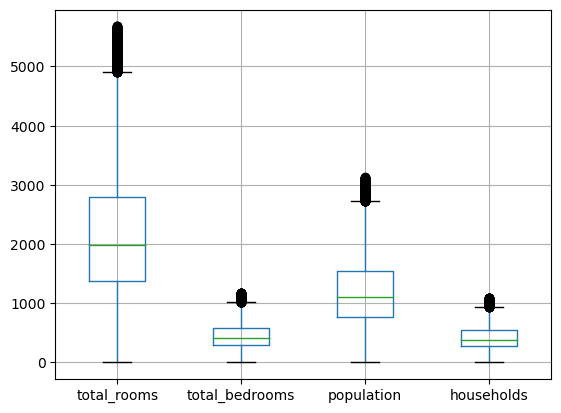

In [182]:
# boxplot after dropping extreme values
cali.boxplot(["total_rooms", "total_bedrooms", "population", "households"])

## Check for skewness

from the following plot we can see there is right skew for the features which we'll then perform log transformation on
- total_rooms 
- total_bedrooms
- population
- households
- median_income

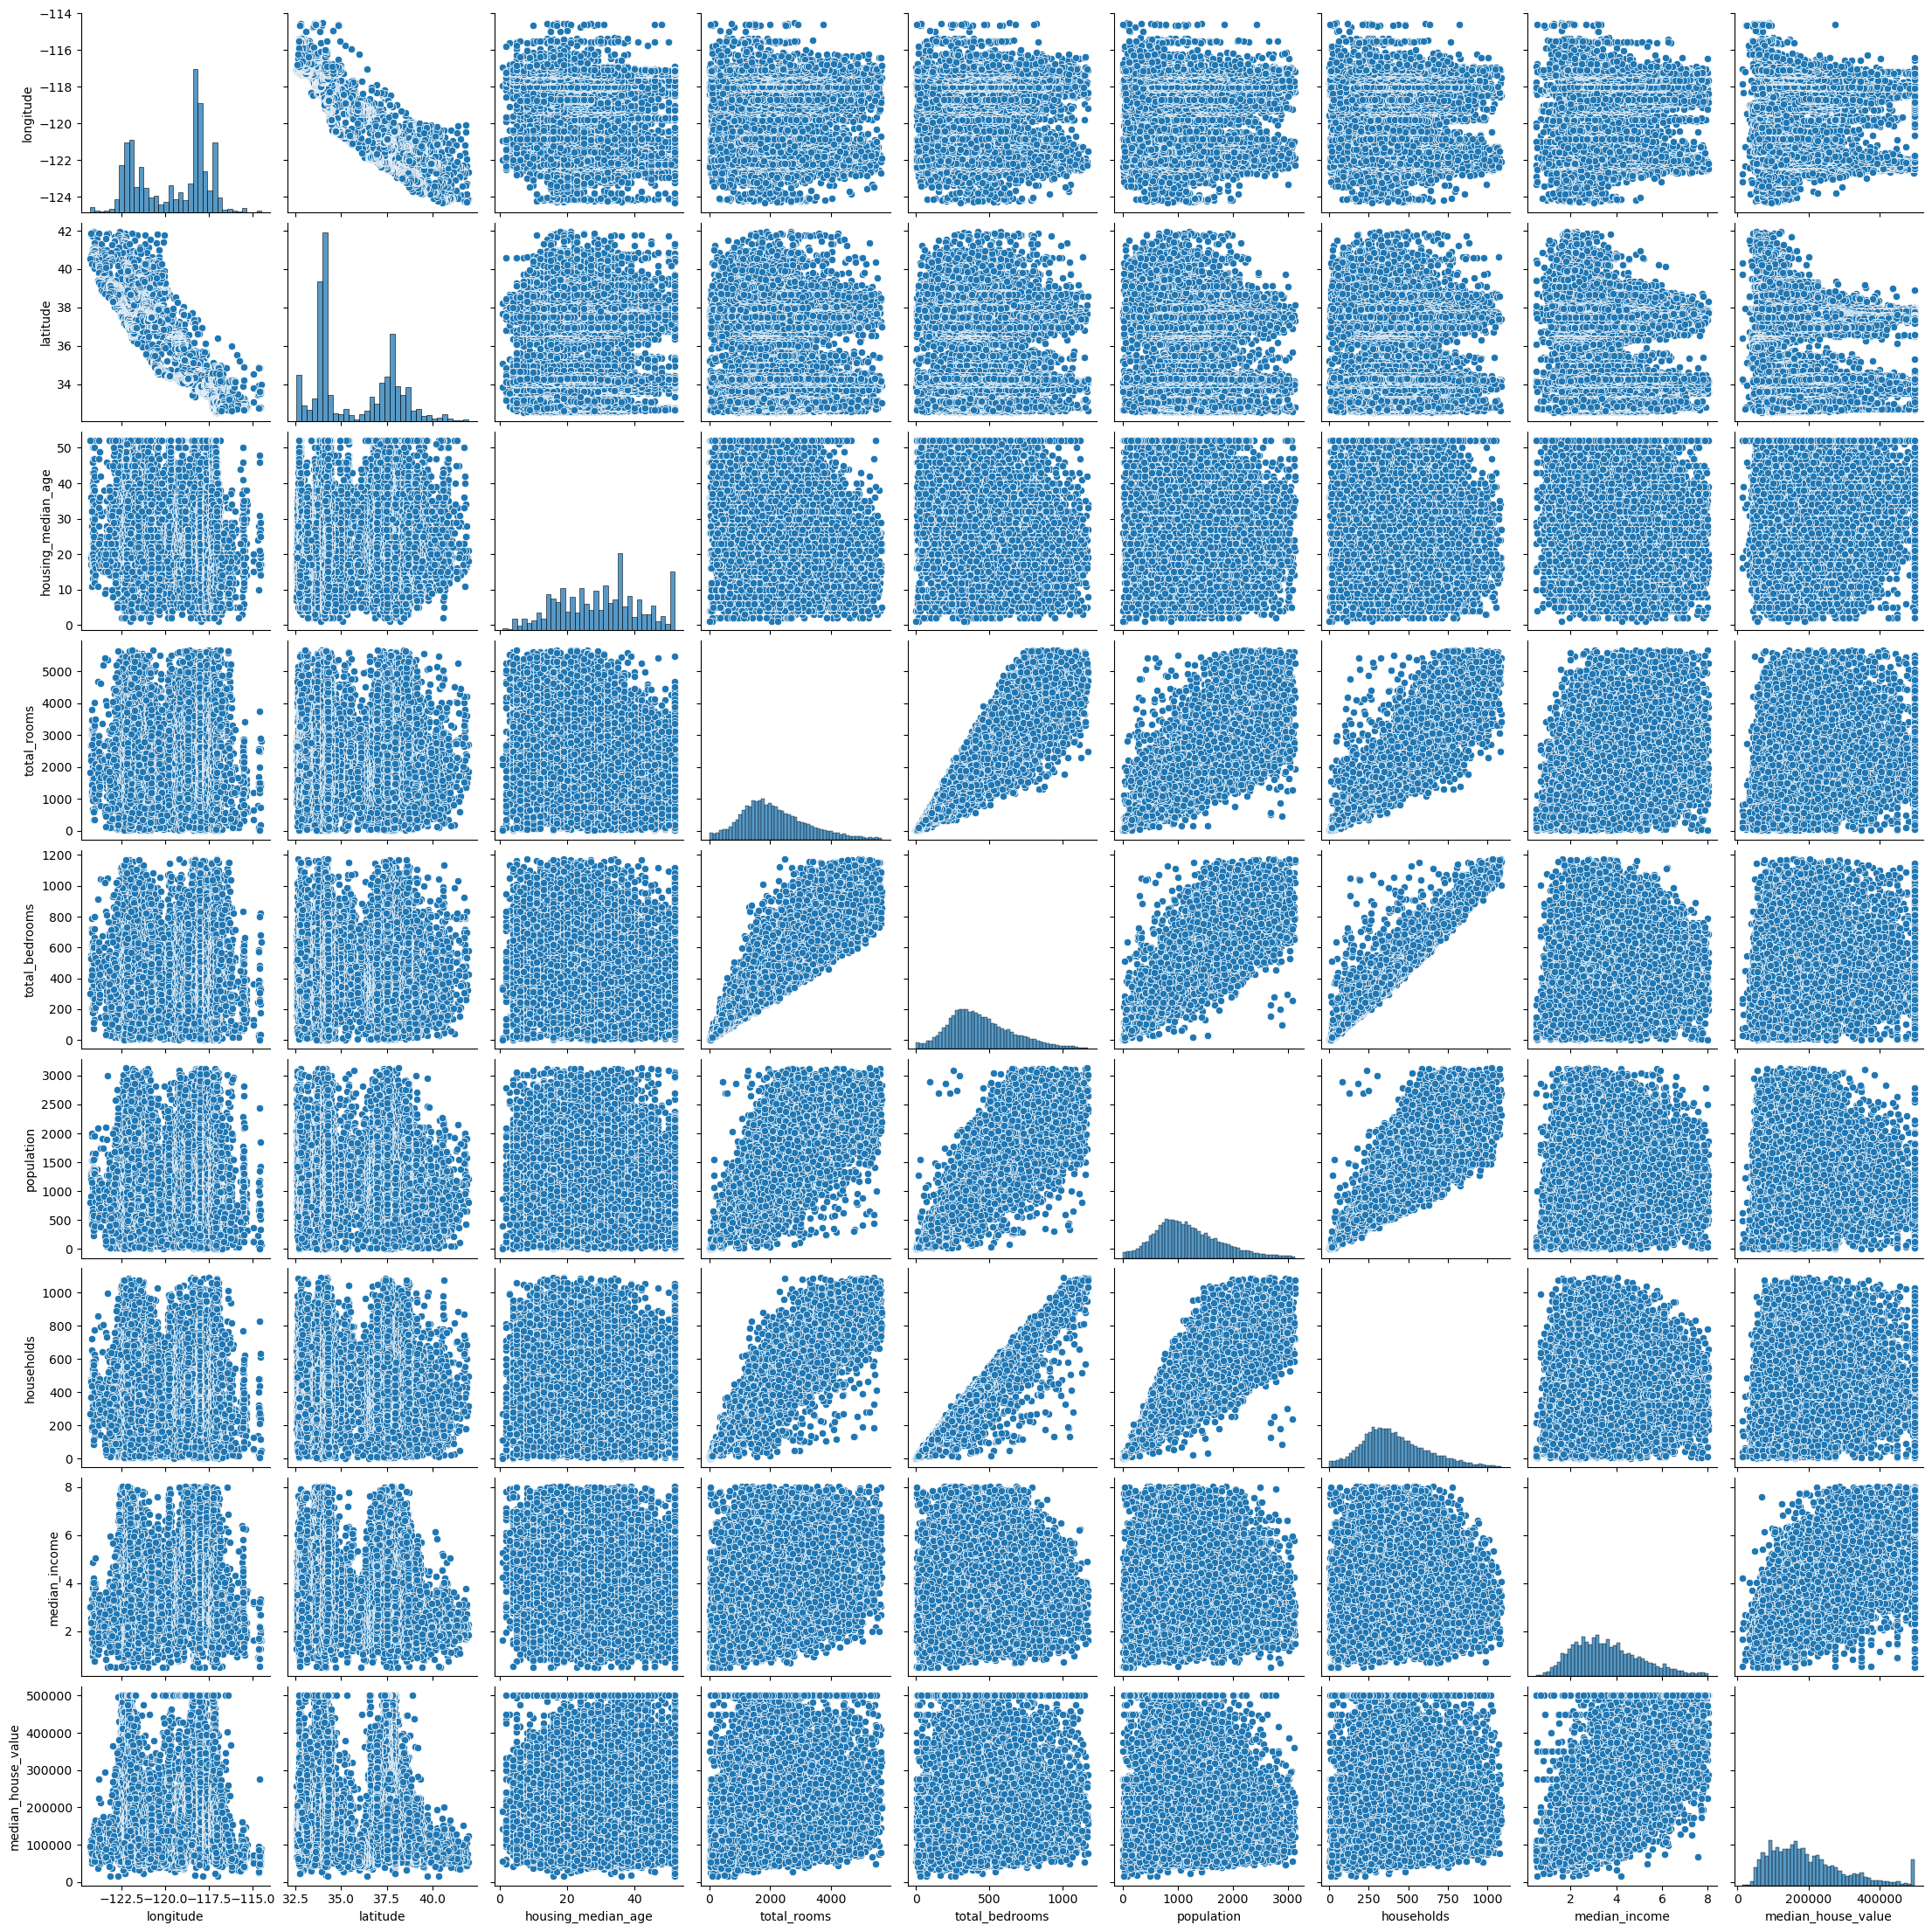

In [183]:
sns.pairplot(cali, plot_kws=dict());

In [184]:
# log transformation
cali['total_rooms']= np.log(cali.total_rooms)
cali['total_bedrooms']= np.log(cali.total_bedrooms)
cali['population']= np.log(cali.population)
cali['households']= np.log(cali.households)
cali['median_house_value']= np.log(cali.median_house_value)

## Check for redundant features
perform ANOVA test

In [186]:
# divide features and target
features = cali.drop(['median_house_value','ocean_proximity'], axis=1)
target = cali["median_house_value"]

# anova test
anova_test = SelectKBest(f_regression, k=6)
anova_test.fit(features, target)

# show results                    
for i in anova_test.get_support(indices=True):
    print(cali.columns[i])

KeyError: 'ocean_proximity'

Mutual information

In [ ]:
mutual_information = SelectKBest(mutual_info_regression, k=6)
mutual_information.fit(features, target)

for i in mutual_information.get_support(indices=True):
    print(cali.columns[i])

longitude
latitude
housing_median_age
total_rooms
median_house_value
log_total_rooms


## Dimension reduction
Using PCA

In [ ]:
pca = PCA(n_components=0.99, svd_solver='auto')
pca.fit(features)
PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.99)

## Dummy encoding

In [ ]:
# encode categorical variables as numeric using dummy encoding
encoded_cali = pd.get_dummies(data=cali,drop_first=True)
encoded_cali

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
6          1094.0       514.0         3.6591            299200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       log_total_rooms  log_total_bedrooms  log_population  log_households  \
2             7.290975            5.247024        6.206576        5.176150   
3             7.149917            5.459586        6.324359        5.389072   
4             7.394493            5.634790        6.336826        5.556828   
5             6.823286            5.361292        6.023448        5.262690   
6             7.837949            6.192362        6.997596        6.242223   
...                ...                 ...             ...             ...   
20635         7.417580            5.924256        6.739337        5.799093   
20636         6.546785            5.010635        5.874931        4.736198   
20637         7.720462            6.184149        6.914731        6.070738   
20638         7.528332            6.013715        6.608001        5.855072   
20639         7.932003            6.423247        7.234898        6.272877   

       log_median_house_value  ocean_proximity_INLAND  ocean_proximity_OTHER  
2                   12.771671                       0                      1  
3                   12.740517                       0                      1  
4                   12.743151                       0                      1  
5                   12.505066                       0                      1  
6                   12.608868                       0                      1  
...                       ...                     ...                    ...  
20635               11.265745                       1                      0  
20636               11.252859                       1                      0  
20637               11.432799                       1                      0  
20638               11.346871                       1                      0  
20639               11.400876                       1                      0  

[17994 rows x 16 columns]